In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as po
import plotly.graph_objs as pg

In [43]:
pd.options.display.float_format = '{:.2f}'.format

In [44]:
df1 = pd.read_csv(r"gcb2022_c.csv")

In [45]:
df1.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1960,0.41,0.13,0.27,0.00,0.02,0.00,NaN,0.05
1,Afghanistan,AFG,1961,0.49,0.18,0.29,0.00,0.02,0.00,NaN,0.06
2,Afghanistan,AFG,1962,0.69,0.30,0.36,0.00,0.03,0.00,NaN,0.08
3,Afghanistan,AFG,1963,0.71,0.26,0.39,0.00,0.05,0.00,NaN,0.08
4,Afghanistan,AFG,1964,0.84,0.30,0.48,0.00,0.06,0.00,NaN,0.09


In [46]:
df1.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,14260.00,14260.00,13066.00,13066.00,13066.00,12987.00,13066.00,1532.00,14260.00
mean,1990.50,98.02,43.42,39.50,18.68,3.33,1.34,6.20,4.74
std,17.90,508.51,299.85,172.52,94.64,27.16,5.43,18.68,12.04
min,1960.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1975.00,0.30,0.00,0.51,0.00,0.00,0.00,0.47,0.27
50%,1990.50,3.40,0.02,2.82,0.00,0.17,0.00,1.15,1.68
75%,2006.00,34.55,4.95,19.08,4.34,1.28,0.08,4.17,6.08
max,2021.00,11472.37,7955.99,2644.24,1674.00,858.23,88.38,177.26,416.09


In [47]:
df1.isna().sum()

Country                   0
ISO 3166-1 alpha-3      372
Year                      0
Total                     0
Coal                   1194
Oil                    1194
Gas                    1194
Cement                 1273
Flaring                1194
Other                 12728
Per Capita                0
dtype: int64

In [48]:
# Replace NaN values with Mean
co2 = df1.fillna(0)
co2

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1960,0.41,0.13,0.27,0.00,0.02,0.00,0.00,0.05
1,Afghanistan,AFG,1961,0.49,0.18,0.29,0.00,0.02,0.00,0.00,0.06
2,Afghanistan,AFG,1962,0.69,0.30,0.36,0.00,0.03,0.00,0.00,0.08
3,Afghanistan,AFG,1963,0.71,0.26,0.39,0.00,0.05,0.00,0.00,0.08
4,Afghanistan,AFG,1964,0.84,0.30,0.48,0.00,0.06,0.00,0.00,0.09
...,...,...,...,...,...,...,...,...,...,...,...
14255,Zimbabwe,ZWE,2017,9.60,5.90,3.23,0.00,0.47,0.00,0.00,0.65
14256,Zimbabwe,ZWE,2018,11.80,7.18,4.06,0.00,0.56,0.00,0.00,0.78
14257,Zimbabwe,ZWE,2019,11.11,6.89,3.66,0.00,0.57,0.00,0.00,0.72
14258,Zimbabwe,ZWE,2020,10.61,6.72,3.32,0.00,0.57,0.00,0.00,0.68


In [49]:
dfx = co2[['Country', 'Year', 'Total']]
dfx.head(10)

,Country,Year,Total
0,Afghanistan,1960,0.41
1,Afghanistan,1961,0.49
2,Afghanistan,1962,0.69
3,Afghanistan,1963,0.71
4,Afghanistan,1964,0.84
5,Afghanistan,1965,1.01
6,Afghanistan,1966,1.09
7,Afghanistan,1967,1.28
8,Afghanistan,1968,1.22
9,Afghanistan,1969,0.94


In [50]:
dfx.groupby(['Country']).Total.sum().sort_values(ascending=False)[:10]

Country
USA              305643.35
China            244649.99
Russia           105134.61
Japan             61187.57
Germany           57848.97
India             54384.74
United Kingdom    34357.25
Canada            28054.79
Ukraine           26846.86
France            25009.40
Name: Total, dtype: float64

## Summary
The figures above represent the top ten countries which have produced the most carbon emissions from 1960-2021. It's important to note that these values are just a snapshot of emissions and don't provide context on why emissions vary between regions or trends over time. Further analysis and context would be needed to draw meaningful conclusions about the environmental impact of these emissions.

## Exploratory Data Analysis

In [51]:
country_total = dfx.groupby(['Country']).Total.sum().sort_values(ascending=False)[:10]

Text(0.5, 1.0, 'Countries Producing the Most Carbon Emissions 1960-2021')

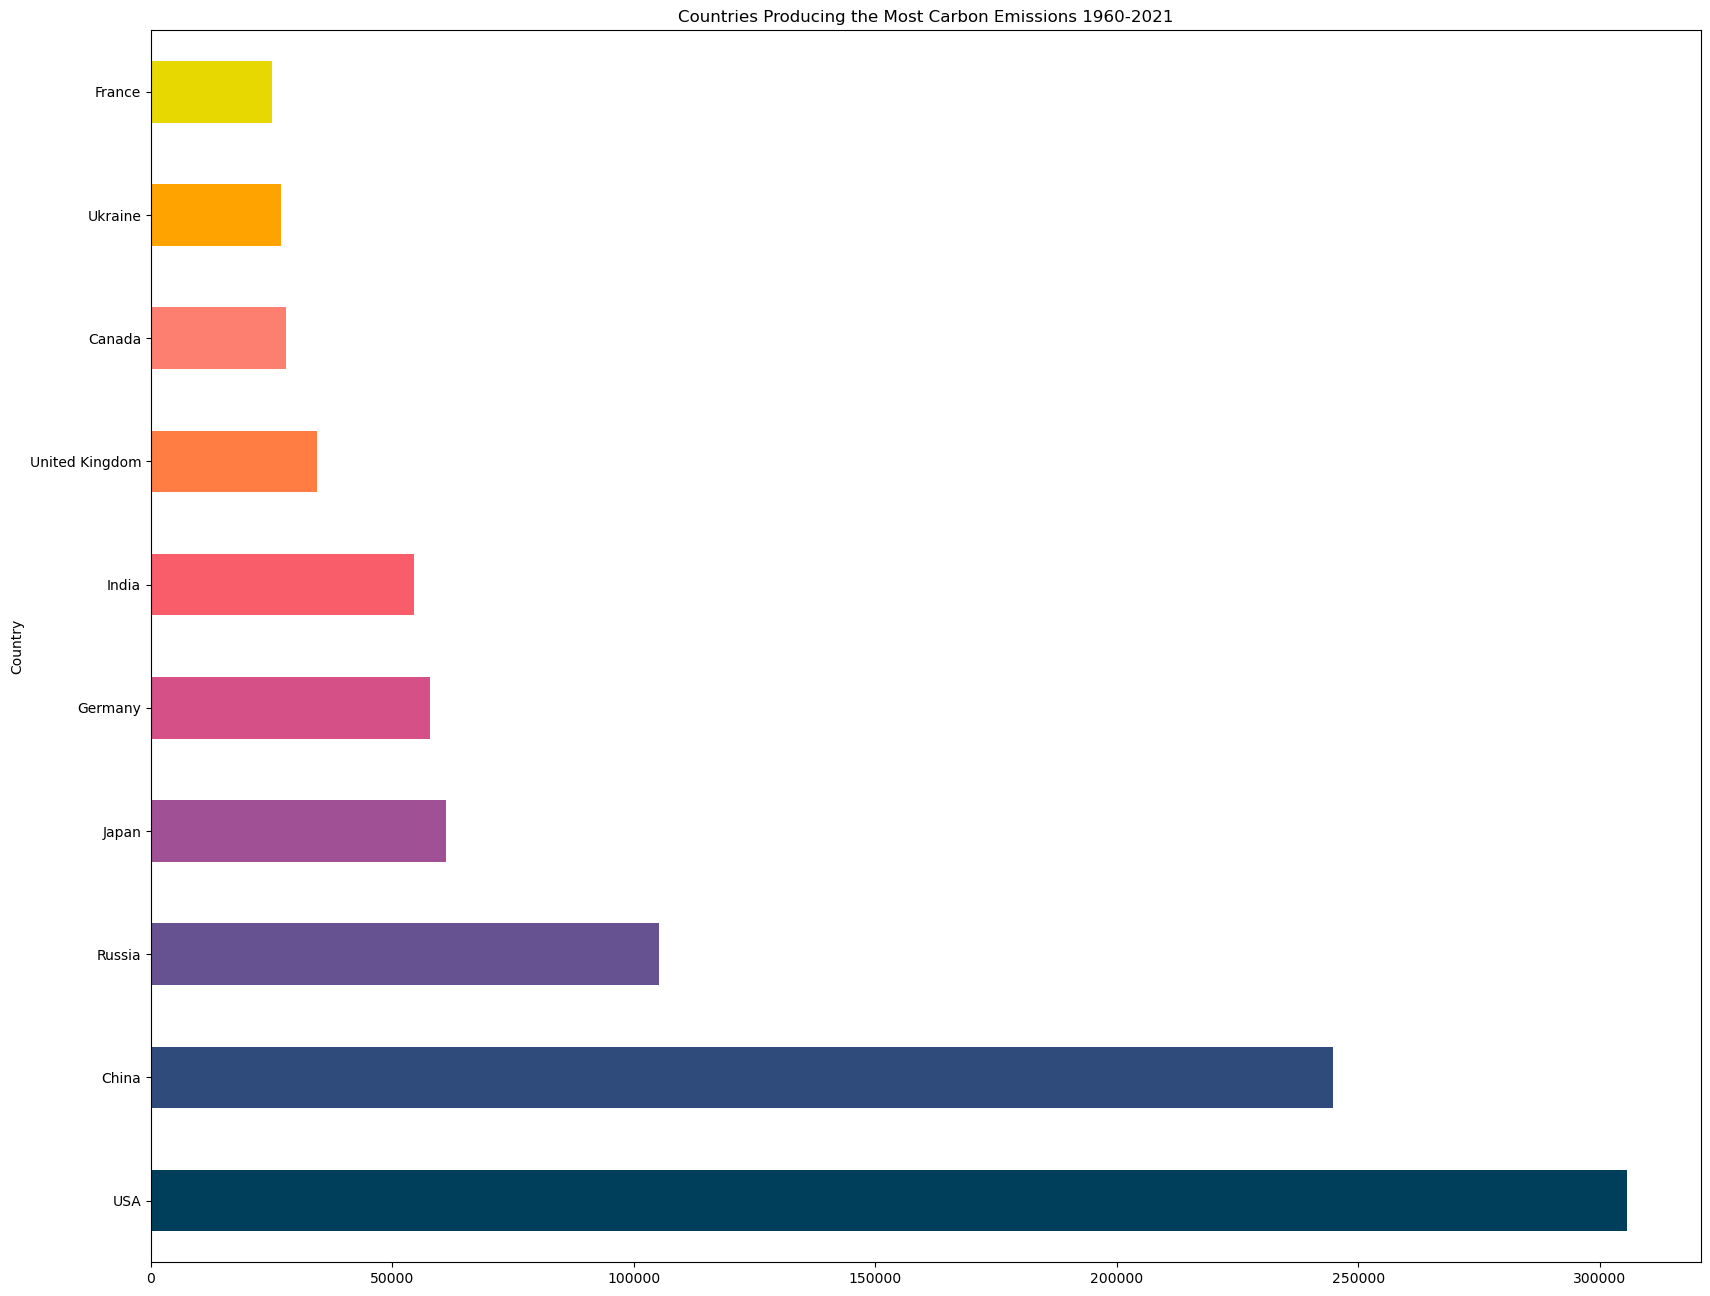

In [60]:
plt.figure(figsize=(20,16))
colors = [
    '#003f5c',
    '#2f4b7c',
    '#665191',
    '#a05195',
    '#d45087',
    '#f95d6a',
    '#ff7c43',
    '#fd7f6f',
    '#ffa300',
    '#e6d800'
]
ax = country_total.plot.barh(color = colors)
ax.set_title('Countries Producing the Most Carbon Emissions 1960-2021')

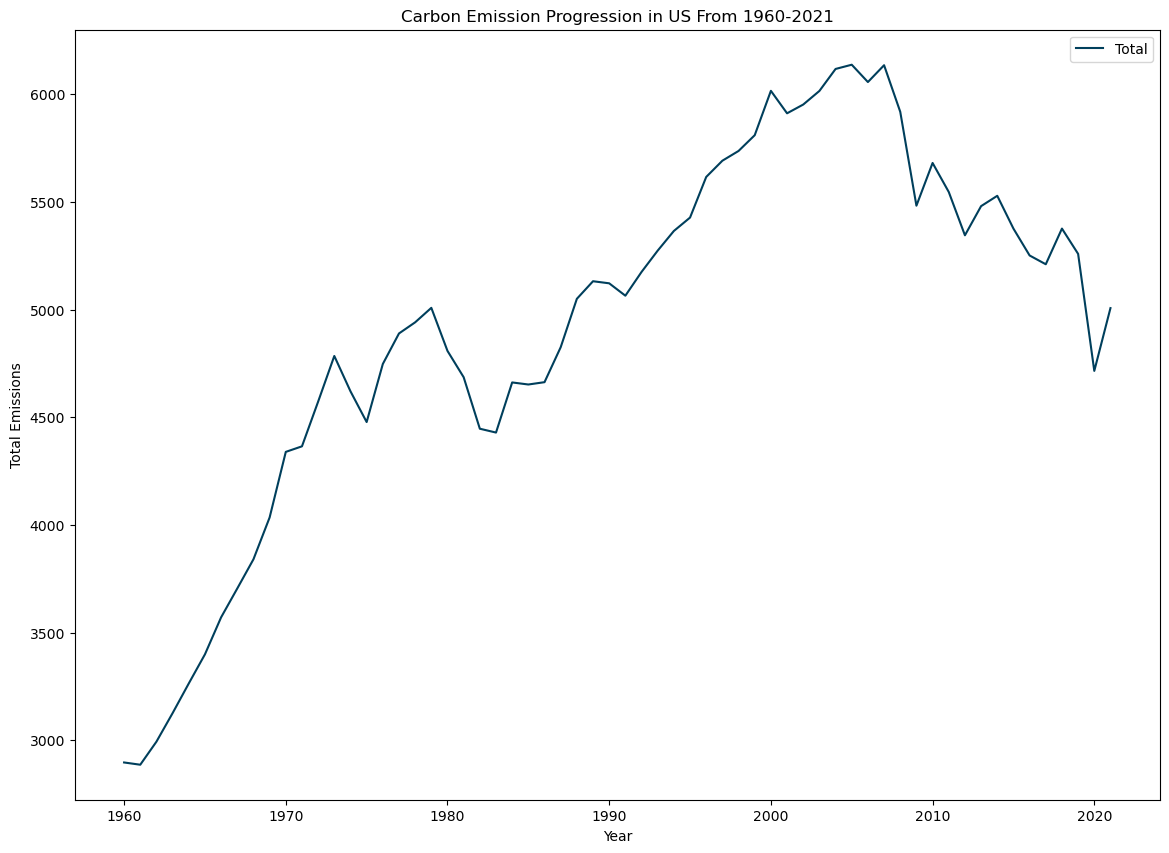

In [61]:
# Line plot for US from 1960-2020
usa = co2.query('Country == "USA"')

color = '#003f5c'
ax = usa.plot(x='Year', y='Total', kind='line', figsize=(14,10), color=color)
ax.set_ylabel('Total Emissions')
ax.set_title('Carbon Emission Progression in US From 1960-2021')
plt.show()

## Summary
As shown above, carbon emissions in the United States have exhibited a complex pattern over the decades. While emissions steadily increased from 1960 to the mid-2000s, subsequent years saw a plateau, a slight decline, and fluctuations influenced by economic, technological, and policy factors.The COVID-19 pandemic temporarily reduced emissions in 2020, but emissions began to rise again in 2021. The trajectory of future emissions will depend on various factors, including government policies, technological advancements, and societal efforts to address climate change.